In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_json('trades.json')
df = pd.read_json('bfxbook.json') # has all the trades
#df = pd.read_json('bfxtrades.json')
df.head()

,_id,_index,_score,_source,_type
0,JDu2nWMBIJAPixw5vdEP,bitfinexbtcbook,1,"{'book': [{'count': 1, 'amount': 0.93, 'price'...",doc
1,hDu1nWMBIJAPixw5WMLJ,bitfinexbtcbook,1,"{'book': [{'count': 7, 'amount': 7.10205738, '...",doc
2,8juznWMBIJAPixw5fqw4,bitfinexbtcbook,1,"{'book': [{'count': 9, 'amount': 10.01907398, ...",doc
3,3Tu2nWMBIJAPixw5Rsph,bitfinexbtcbook,1,"{'book': [{'count': 1, 'amount': 0.5, 'price':...",doc
4,Zjy7nWMBIJAPixw5OQX7,bitfinexbtcbook,1,"{'book': [{'count': 6, 'amount': 3.050287, 'pr...",doc


In [2]:
df._source[0].keys()

dict_keys(['book', 'localtime'])

In [3]:
import datetime
data = pd.DataFrame(df._source[0]['book'])
time = df._source[0]['localtime']
data['localtime'] = time
data['t'] = datetime.datetime.fromtimestamp(time/1000.0).strftime('%M:%S.%f')

In [4]:
all_data = pd.DataFrame()
for i in range(len(df)):
    data = pd.DataFrame(df._source[i]['book'])
    time = df._source[i]['localtime']
    data['localtime'] = time
    data['t'] = datetime.datetime.fromtimestamp(time/1000.0).strftime('%Y-%m-%d %H:%M')#%Y-%m-%d #:%S.%f
    all_data = pd.concat([data,all_data], axis=0)

In [5]:
df = all_data
df = df.sort_values('localtime')
df.head(10)

,amount,count,price,localtime,t
99,8.870000,1,7518.9,1527358952359,2018-05-26 20:22
128,-0.003976,1,7567.8,1527358952359,2018-05-26 20:22
129,-0.068000,1,7568.0,1527358952359,2018-05-26 20:22
130,-0.406136,2,7568.2,1527358952359,2018-05-26 20:22
131,-4.017061,1,7568.6,1527358952359,2018-05-26 20:22
132,-0.310000,1,7568.7,1527358952359,2018-05-26 20:22
133,-8.050000,1,7568.8,1527358952359,2018-05-26 20:22
134,-0.702910,2,7568.9,1527358952359,2018-05-26 20:22
135,-0.160000,1,7569.6,1527358952359,2018-05-26 20:22
136,-0.728980,2,7569.7,1527358952359,2018-05-26 20:22


In [6]:
time = list(set(df.t))

In [7]:
timerange = pd.date_range(start=min(df.t), end=max(df.t), freq='min').strftime('%Y-%m-%d %H:%M').tolist()

In [8]:
for i in range(len(timerange)):
    print( (df.t==timerange[i]).sum() )

600
1200
1200
1200
1200
1200
1200
1200
1200
1000
1200
1200
1200
1200
1200
1200
1200
1200
1200
1200
1000
1200
1200
1200
1200
1200
1200
1200
1200
1200
1200
1000
1200
1200
1200
1200
1200
1200
1200
1200
1200
1000
1200
1200
1200
1200
1200
1200
1200
1200
1200
1200
1200
1000
1200
1200
1200
1200
1200
1200
600


In [9]:
import datetime
import time as ttime
# damn time conversion stuff
def datetime_to_epoch_ms(datetime_string):
    dt = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M')
    return int(ttime.mktime(dt.timetuple()) * 1000)

In [10]:
#mpl = 100 #multiplier --> to cut away floating point numbers
#sta = int(df.price.min()*100)
#sto = int(df.price.max()*100)
#stepSize=0.5 #in Bitcoins
#priceBins = range(sta, sto, int(stepSize*100))

stepSize = 3 #define Step-Size of Bins
priceBins = np.arange(df.price.min(),df.price.max(),stepSize)

volumeArray = np.zeros((len(priceBins),len(set(timerange))))

#plt.figure(figsize=(100,10))
outData=[]
for i, pbin in enumerate(priceBins[1:]):
    ix = ((df.price>=priceBins[i]) & (df.price<(priceBins[i+1])))
    for it, t in enumerate(timerange):
        vol = (df[(df.t==t)&ix].amount).mean()
        volumeArray[i,it]= vol
        if vol>1:
            outData.append([datetime_to_epoch_ms(t), pbin, vol]) 

In [144]:
out = pd.DataFrame(outData,columns=['date','price','vol'])
#out.to_csv('volArray',index=False)
out.to_csv('volArray.csv')

In [119]:
timerange

array([ 7496.3,  7499.3,  7502.3,  7505.3,  7508.3,  7511.3,  7514.3,
        7517.3,  7520.3,  7523.3,  7526.3,  7529.3,  7532.3,  7535.3,
        7538.3,  7541.3,  7544.3,  7547.3,  7550.3,  7553.3,  7556.3,
        7559.3,  7562.3,  7565.3,  7568.3,  7571.3,  7574.3,  7577.3,
        7580.3,  7583.3])

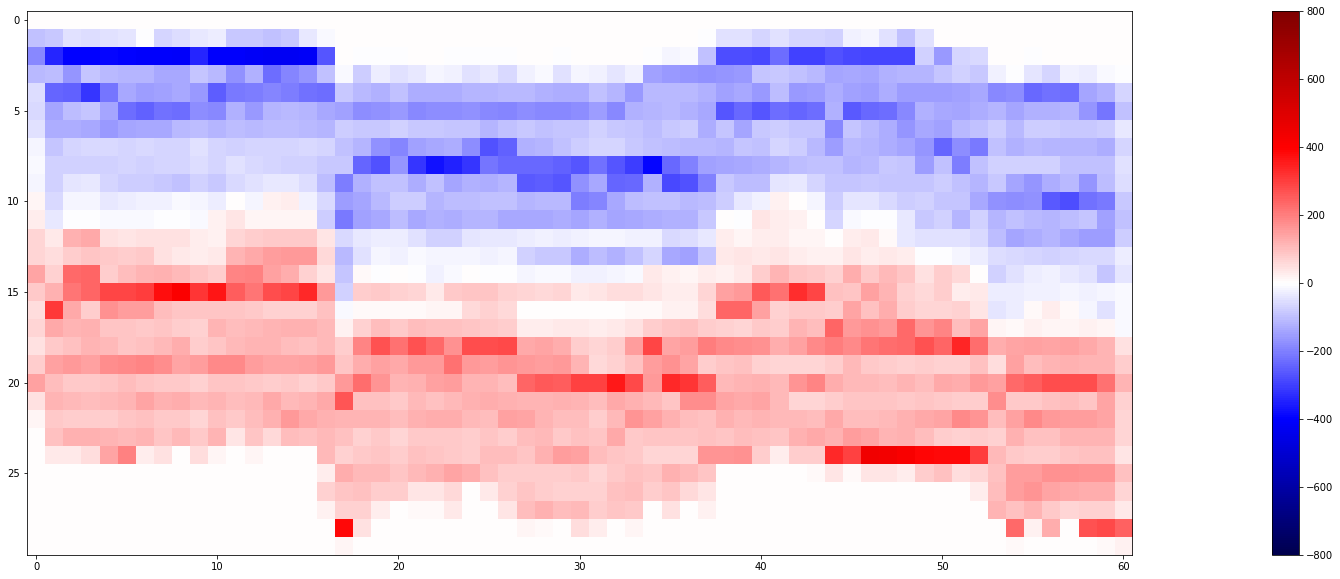

In [125]:
import matplotlib
plt.figure(figsize=(50,10))
#plt.imshow(volumeArray*(volumeArray>1), cmap='Reds')#,norm=matplotlib.colors.LogNorm())#norm=matplotlib.colors.LogNorm())#
#plt.imshow(volumeArray*(volumeArray<1), cmap='Blues')
plt.imshow(volumeArray[::-1,::1], cmap='seismic',vmin=-800, vmax=800)#norm=matplotlib.colors.LogNorm()
plt.colorbar()

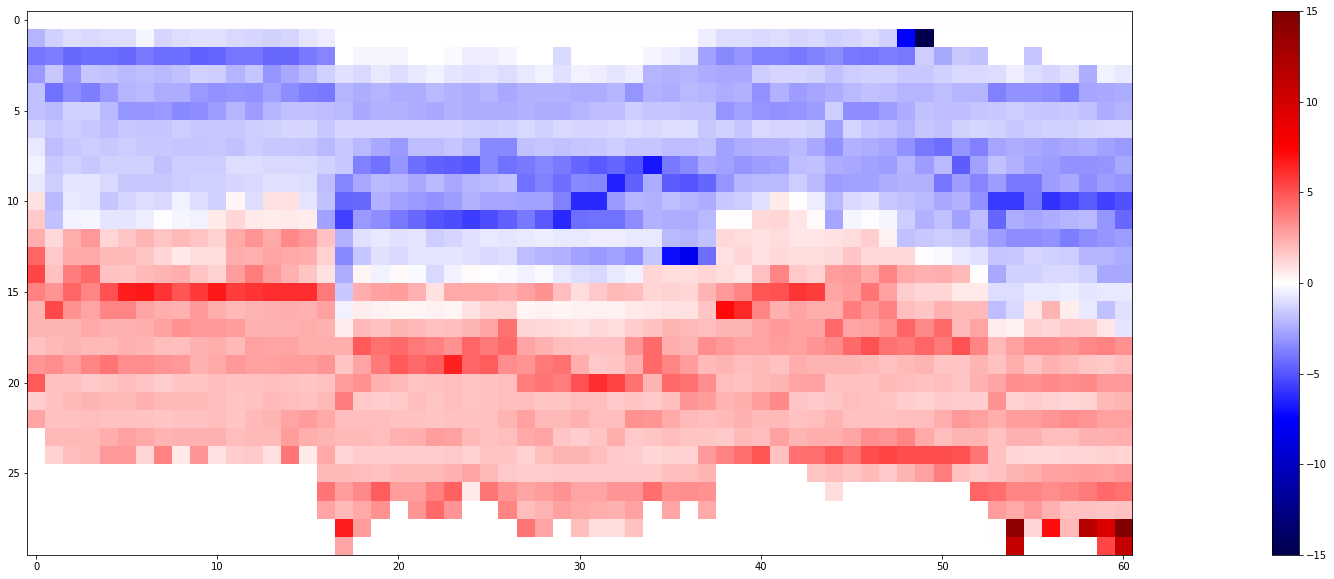

In [14]:
import matplotlib
plt.figure(figsize=(50,10))
#plt.imshow(volumeArray*(volumeArray>1), cmap='Reds')#,norm=matplotlib.colors.LogNorm())#norm=matplotlib.colors.LogNorm())#
#plt.imshow(volumeArray*(volumeArray<1), cmap='Blues')
plt.imshow(volumeArray[::-1,::1], cmap='seismic',vmin=-15, vmax=15)#norm=matplotlib.colors.LogNorm()
plt.colorbar()

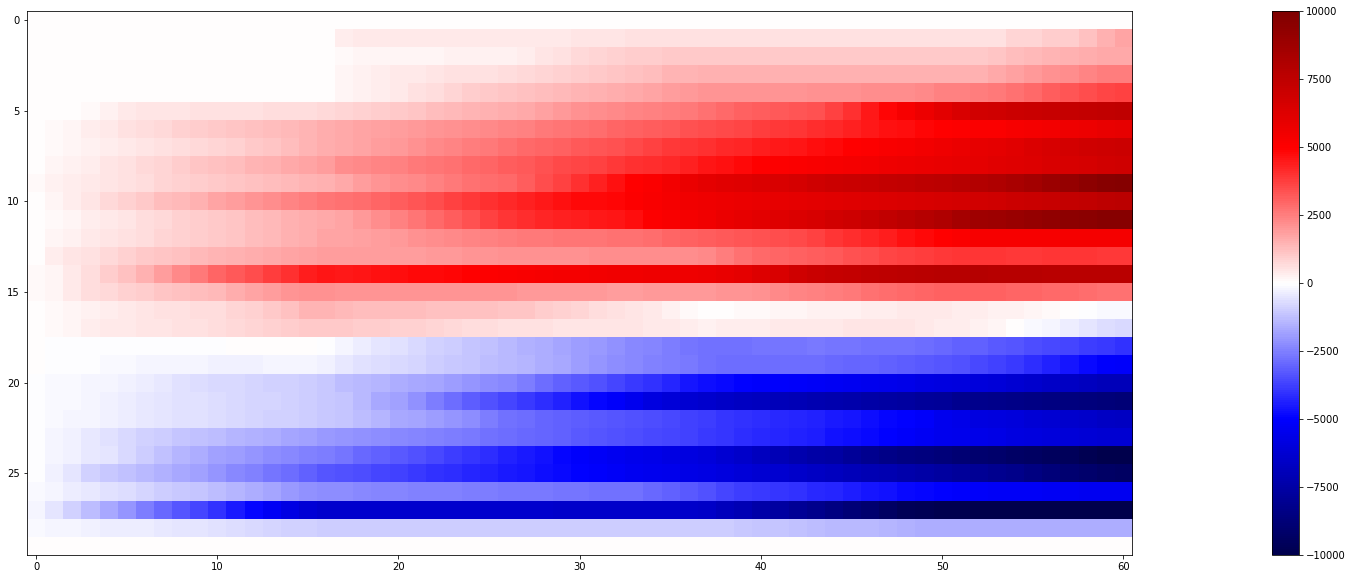

In [112]:
import matplotlib
plt.figure(figsize=(50,10))
plt.imshow(volumeArray**2, cmap='seismic',vmin=-10000, vmax=10000,norm=matplotlib.colors.LogNorm())#
plt.colorbar()

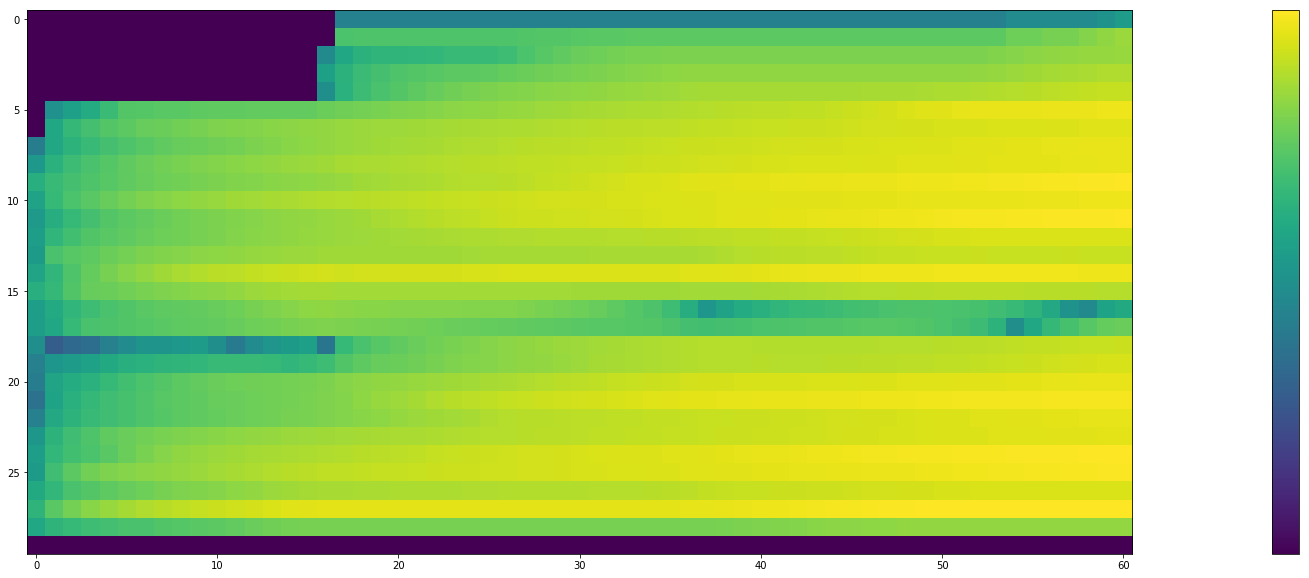

In [118]:
import matplotlib
plt.figure(figsize=(50,10))
plt.imshow(volumeArray**2+0.01, cmap='viridis',norm=matplotlib.colors.LogNorm())#
plt.colorbar();

In [ ]:
yinterp = np.interp(xvals, x, y)

In [27]:
max(abs(df.amount))

106.82179187

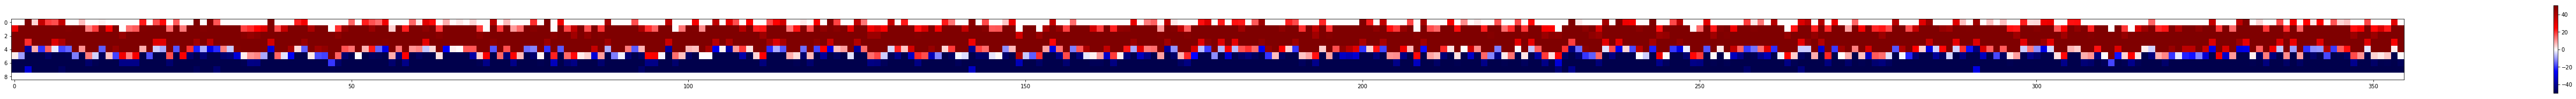

In [23]:
import matplotlib
plt.figure(figsize=(100,3))
plt.imshow(volumeArray, cmap='seismic',vmin=-50, vmax=50)#norm=matplotlib.colors.LogNorm()
plt.colorbar()

In [39]:
counts = pd.value_counts(pd.cut(df.price, bins=price_bins))

In [96]:
t_idx=pd.cut(df.timestamp, bins=time_bins)

(array([  15.,   39.,  103.,   76.,   72.,  101.,   69.,   84.,   79.,   50.]),
 array([ 7526.3 ,  7529.35,  7532.4 ,  7535.45,  7538.5 ,  7541.55,
         7544.6 ,  7547.65,  7550.7 ,  7553.75,  7556.8 ]),
 <a list of 10 Patch objects>)

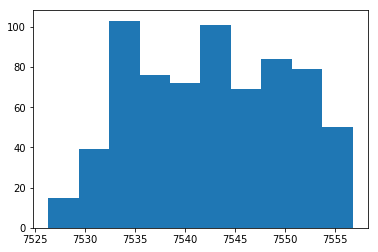

In [28]:
plt.hist(data.price)

In [ ]:
# assuming your "timestamp" column is labeled ts: 
df['hod'] = [r. for r in df.timestamp]

# now you can calculate stats for each bin
ave = df[ (df.hod>=0) & (df.hod<6) ].mean()

In [113]:
df.timestamp.iloc[0].min

Timestamp('1677-09-21 00:12:43.145225')

# get the data from ElasticSearch-Server
--> wasn't working

In [1]:
from elasticsearch import Elasticsearch

txt = ''
with open('elasticpw.txt') as f:
    for line in f.readlines():
        txt+=line
    txt = txt.replace('\n','')

# you can use RFC-1738 to specify the url
es = Elasticsearch([txt])

In [1]:
import json

msg = [248307586, 1527023078373, -0.45705041, 8091.1]
doc = {
    "tid": msg[0],
    "timestamp": msg[1],
    "amount": msg[2],
    "price": msg[3]
}

res = es.get(index="bitfinextradesbtc", doc_type='doc', id=250)

NameError: name 'd' is not defined

In [ ]:
#res = es.search(index="index", body={"query": {"match_all": {}}}) #TODO

# Ignore other methods that have been tried ;)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
price_bins = np.linspace(df.price.min(), df.price.max(), 10)
time_bins = pd.date_range(start=min(df.timestamp), end=max(df.timestamp), freq='1s')

H, xedges, yedges = np.histogram2d(df.price, df.t, bins=(price_bins, time_bins))
H = H.T  # Let each row list bins with common y range.
plt.imshow(H)

ValueError: could not convert string to float: '00:03.222000'